---
title: "Linear Models"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: false
    html-math-method: katex
jupyter: python3
---

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Linear models are an important class of machine learning models that have been applied in various areas. We will study first linear models we can apply to **classification problems**, following by addressing **linear regression models.**

# Linear Models for Classification

Linear models for classification are models for which the **decision boundaries are linear functions of the feature vector** $x$ (Bishop, 2006, p 179), (Hastie et al., 2001, p.101). There are several important linear models for classification. Here we will cover **logistic regression**, **linear discriminant analysis** and **naive bayes**.

## Logistic Regression

Logistic regression models $p(\textbf X)=\Pr(Y=1|\textbf X)$ by assuming that a specific monotonic transformation of $p(\textbf X)$ is linear. Logistic Regression uses the form:

$$
p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

Which, with a bit of rearrangement, lead us to the _odds_:

$$
\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}
$$

Finally, by **taking the logarithm** on both sides of this equation, we arrive at:

$$
\log\left[ \frac{p(X)}{1-p(X)} \right]={\beta_0+\beta_1X}
$$

> This **monotone transformation** is called the **log odds** or **logit transformation of $p(X)$**. 

As seen in this last equation, the decision boundary of the binary classifier defined by the logistic regression is linear and, therefore, this is a linear classifier. What remains is to estimate the unknown parameters a and b and replace them in the equation to have a functioning classifier. This is done by maximum likelihood estimation (MLE).

### Model Training and Evaluation

In this example, we work with a genomic data (gene expressions) taken from patients who were affected by oral leukoplakia. Data was obtained from Gene Expression Omnibus (GEO). The data **includes 19,897 features** (19,894 genes and three binary clinical variables) and **86 patients**. Thirty-five individuals (35/86; 40.7%) developed oral cancer (OC) over time and the rest did not. 

In [19]:
#| label: tbl-raw-dataset
#| tbl-cap: Iris Dataset
# Read the CSV file into a DataFrame
df = pd.read_csv('GenomicData_OralCancer.csv')

# Dictionary
target_names_dict = {'no oral cancer development': 0, 
                     'oral cancer development':1 }

# Add the target names column to the DataFrame
df['target'] = df['outcome.ch1'].map(target_names_dict)
df.head(3)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,X8180410,X8180411,X8180412,X8180413,X8180414,X8180415,X8180416,X8180417,X8180418,target
0,Oral leukoplakia LM328,GSM652761,Public on Feb 01 2011,Jan 11 2011,Feb 01 2011,RNA,1,Oral leukoplakia,Homo sapiens,Sex: female,...,10.15,9.74,6.93,6.87,6.40,6.09,6.12,8.29,7.60,0
1,Oral leukoplakia LM329,GSM652762,Public on Feb 01 2011,Jan 11 2011,Feb 01 2011,RNA,1,Oral leukoplakia,Homo sapiens,Sex: female,...,10.25,9.93,6.92,6.84,6.26,6.26,6.40,8.08,6.24,0
2,Oral leukoplakia LM331,GSM652763,Public on Feb 01 2011,Jan 11 2011,Feb 01 2011,RNA,1,Oral leukoplakia,Homo sapiens,Sex: male,...,9.95,8.21,7.08,6.98,6.47,6.53,6.27,8.24,7.43,1


Let's train our model now using the genes features:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LRR

# Target vs Inputs
X = df.iloc[:,57:].drop(columns=['target']) # Covariates-Only
y = df["target"] # Target-Outcome

# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Instantiate Class into Object. Set Parameters
lrr = LRR()

# Train Model
lrr.fit(X_train, y_train)

# Predict
y_test_pred = lrr.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy' , lrr.score(X_test, y_test).round(2) ) 

Accuracy 0.89


## Linear Discriminant Analysis (LDA)

In logistic regression we model directly the conditional distribution $\Pr(Y=k|X=x)$. In this new and indirect approach we model the distribution of $X$ in each of the classes $(0,1)$ separately, and then use Bayes theorem to flip things around and obtain $\Pr(Y=k |X=x)$. When the distribution of $X$ within each class is assumed to be normal, it turns out that the model is very similar in form to logistic regression.

Recall the Bayes Theorem:

$$
\Pr(Y=k|X=x)=\frac{\blue{\Pr(X=x|Y=k)}\times \pink{\Pr(Y=k)}}{\Pr(X=x)}
$$

Suppose that we wish to *classify* an observation into one of $K$ classes, where $K ≥ 2$. 

- Let $\pink{\pi_k}$ represent the overall ***prior probability*** that observation $i$ **comes from the $k$ th class**.
- Let $\blue{f_k(X)\equiv\Pr(X|Y=k)}$ denote the **density function of $X$** that comes from the $k$ th class.

One writes this slightly differently for **discriminant analysis**:

$$
\Pr(Y=k|X=x)=\frac{\blue{f_k(x)}\times \pink{\pi_k}}{\sum^K_{l=1} \blue{f_l(x)}\times \pink{\pi_l}}
$$

- $\blue{f_k(x)}=\blue{\Pr(X=x|Y=k)}$ is the ***density for $X$*** in class $k$. We will assume ***normal densities***, separately in each class.
- $\pink{\pi_k}=\pink{\Pr(Y=k)}$ is the marginal or ***prior probability*** for class $k$.
- Finally, $\green{p_k(x)}=\Pr(Y=k|X=x)$ is the ***posterior probability*** that an observation $X=x$ belong to class $k$.

> **Posterior Probability**: *It is the probability that the observation belongs to the $k$th class, given the predictor value $x$ for that observation.*
> 
- **Intuition**: Instead of directly computing $\green{p_k(x)}$, we can simply ***plug-in the estimates*** of $\pink{\pi_k}$ and $\blue{f_k(x)}$ into our Bayes Equation.

> **Challenge**: Find a way to estimate $\blue{f_k(x)}$ $\rightarrow$ *linear discriminant analysis*, *quadratic discriminant analysis*, *naive Bayes*.
> **Solution**: LDA imposes the assumption that $f_k(x)$ follows a normal distribution:

$$
f_k(x)=\frac{1}{\sqrt{2\pi\sigma_k}}\exp\left(-\frac{1}{2\sigma^2_k}(x-\mu_k)^2 \right)
$$

Plugging this into Bayes formula, we get a rather complex expression for $p_k(x)$:

$$
p_k(x)=\frac{\pink{\pi_k}\blue{\frac{1}{\sqrt{2\pi\sigma_k}}\exp\left(-\frac{1}{2\sigma^2_k}(x-\mu_k)^2 \right)}}{\sum^{K}_{l=1}\pi_l\frac{1}{\sqrt{2\pi\sigma_l}}\exp\left(-\frac{1}{2\sigma^2_l}(x-\mu_l)^2 \right)}
$$

### Model Training and Evaluation

In `scikit-learn`, the LDA classifier is implemented by the `LinearDiscriminantAnalysis` class from the `sklearn.discriminant_analysis` module However, to achieve a similar representation of LDA one needs to change the default value of `solver` parameter from `'svd'` to `'lsqr'`.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Target vs Inputs
X = df.iloc[:,57:].drop(columns=['target']) # Covariates-Only
y = df["target"] # Target-Outcome

# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Instantiate Class into Object. Set Parameters
lda = LDA(solver='svd') # kept svd for computational reasons

# Train Model
lda.fit(X_train, y_train)

# Predict
y_test_pred = lda.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy' , lda.score(X_test, y_test).round(2) ) 

Accuracy 0.89


## Naive Bayes

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed in the previous section. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers.

In LDA, we make a very strong assumption that greatly simplifies the task: we assume that $f_k$ is the density function for a multivariate normal random variable with class-specific mean $\mu_k$, and shared covariance matrix $Σ$. 

> *The naive Bayes classifier makes the following **assumption** about $f_1(x),..., f_K(x)$: “**Within the $k$ th class, the $p$ covariates are independent**”.*
> 

Stated mathematically, this assumption means that for $k = 1,...,K$,

$$
f_k(x)=f_{k1}(x_1)\times f_{k2}(x_2)\times \cdots\times f_{kp}(x_p)
$$

Why is this assumption so powerful? Essentially, estimating a $p$-dimensional density function is challenging because we must consider not only the *marginal distribution* of each predictor — that is, the distribution of each predictor on its own — but also the *joint distribution* of the predictors — that is, the association between the different predictors.

- By assuming that the $p$ covariates are independent within each class, ***we completely eliminate the need to worry about the association between the $p$ predictors***, because we have simply assumed that there is no association between the predictors!

### Model Training and Evaluation

There are three kinds of naive Bayes classifiers implemented in `scikit-learn`: `GaussianNB`, `BernoulliNB`, and `MultinomialNB`. `GaussianNB` can be applied to any continuous data, we will apply it here:

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB as NB
# Target vs Inputs
X = df.iloc[:,57:].drop(columns=['target']) # Covariates-Only
y = df["target"] # Target-Outcome

# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Instantiate Class into Object. Set Parameters
gnb = NB() # kept svd for computational reasons

# Train Model
gnb.fit(X_train, y_train)

# Predict
y_test_pred = gnb.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy' , gnb.score(X_test, y_test).round(2) ) 

Accuracy 0.94


We see that this model performs better than the others, mainly because Naive Bayes tend to work very well with high-dimensional sparse data. But this model will perform poorly if th assumption of variable-independence is violated.

# Linear Models for Regression

Linear models for regression are models that the estimate of the **response variable** $y$ **is a linear function of parameter** (Bishop, 2006, p.138), (Hastie et al., 2001, p.44); that is,

$$
y =  f(x) = \textbf{X}\beta +\varepsilon
$$

If for the classification setting the decision boundary was a linear function of the input, for regression settings we have that the output, $y$, is a linear function of the features $\textbf X$.

## Linear Regression (OLS)

The most common approach to estimate $\beta$ is to use the least squares method. In this method the goal is to minimize the residual sum of squares (RSS) and the solution is known as the ordinary least squares solution; that is,

$$
\hat\beta=\argmin_{\beta} (\textbf{y}-\textbf{X}\beta)'(\textbf{y}-\textbf{X}\beta)
$$

Assuming $\textbf X$ has full column rank $p+1 ≤ n$ so that $\textbf X '\textbf X$ is invertible, we obtain the well-known OLS estimator:

$$
\hat\beta^{\text{OLS}}=(\textbf{X'}\textbf{X})^{-1}\textbf{X'Y}
$$

### Model Training & Evaluation

In [67]:
#| label: tbl-raw-diabetes
#| tbl-cap: Diabetes Dataset (Inputs)
#| code-fold: true
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)
n_samples = X.shape[0]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
# Train vs Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Instantiate Class into Object. Set Parameters
lr = LR()

# Train Model
lr.fit(X_train, y_train)

# Predict
y_test_pred = lr.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, mean_squared_error
print('R2 Train' , lr.score(X_train, y_train).round(2) ) 
print('R2 Test' , lr.score(X_test, y_test).round(2) ) 
print( 'Test MSE:', mean_squared_error(y_test, y_test_pred).round(2) )

R2 Train 0.55
R2 Test 0.33
Test MSE: 3424.26


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.

## Ridge Regression

Ridge Regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a Penalized Residual Sum of Squares,

$$
\hat{\beta}^{\text{R}}=\argmin_{\beta}\left[\text{RSS}+\lambda\sum^{p}_{j=1}\beta_j^2 \right]
$$

$$
\hat\beta^{\text{R}}=(\textbf{X'}\textbf{X}+\pink{\lambda\textbf{I}_p})^{-1}\textbf{X'Y}
$$

Where the ridge parameter $λ$ controls the extent of shrinkage, and can be viewed as a tuning parameter. Ridge is shrinkage method based on the $l_2$ norm $(q = 2)$, where:

$$
\lambda \lVert \beta \rVert_2^2=\lambda\sum^{p}_{j=1}\pink{\beta_j^2}
$$

$λ ≥ 0$ is a ***Tuning Parameter***, *to be determined separately*. $\lambda$ controls the amount of shrinkage or **relative impact**: *the larger the value of $λ$, the greater the amount of shrinkage*.

*The **shrinkage penalty is small** when coefficients $\beta_1,...,\beta_p$ **are close to zero**, and so it has the effect of shrinking the estimates of $\beta_j$ towards zero*.

1. When $\lambda=0$, the **penalty has no effect**, and we obtain *OLS Estimator*.
2. When $\lambda = \infty$, the ridge coefficients are **shrunk towards zero** (will approach zero).

An important caveat is that the ridge regression estimator is ***not invariant to rescaling*** the regressors nor other linear transformations. Therefore it is common to run ridge regression after applying **standardizing transformations** to the covariates $X$.

> It may not be immediately obvious why such a constraint should improve the fit, but it turns out that shrinking the coefficient estimates can significantly reduce their variance. 

Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As $λ$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.


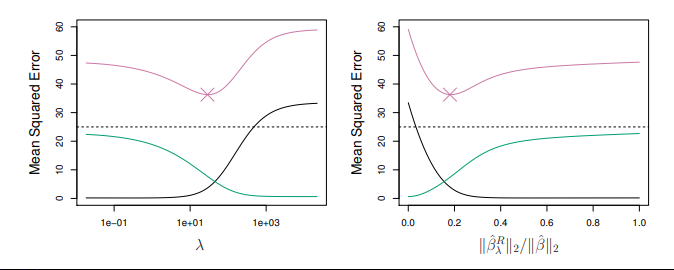

- **$\green{\text{Green Curve = Variance}}$** | **$\text{Black Curve = Bias}$** | **$\pink{\text{Test MSE = Purple}}$.**
- At the least squares coefficient estimates, which correspond to ridge regression with $λ = 0$, the ***variance is high but there is no bias***.
- *But as $λ$  increases, the shrinkage of the ridge coefficient estimates leads to a **substantial reduction in the variance** of the predictions, **at the expense of a slight increase in bias**.*

### Choosing $\lambda$: LOOCV

**Challenge**: Ridge regression will produce a different set of coefficient estimates, $\hat{\beta}_\lambda^{\text{R}}$ , for each value of $λ$. Selecting a good value for $λ$ is **critical**.

**Cross-validation** provides a simple way to select the value of the tuning parameter $\lambda$, for prediction purposes.

1. We choose a grid of $λ$ values, and compute the **cross-validation error** for each value of $λ$. For Ridge, **LOOCV** is used.
2. We then **select** the tuning parameter value $\lambda$ for which the ***cross validation error is smallest***. 
3. Finally, the model is **re-fit** using all of the available observations and the selected value of the tuning parameter.

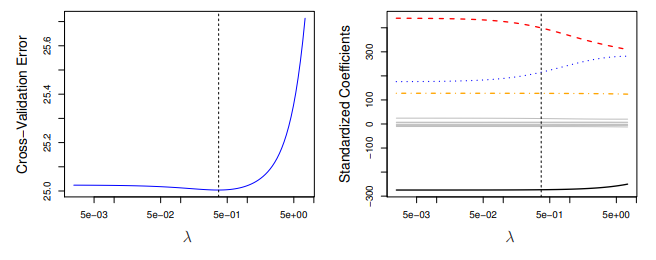

It is also common to choose not the $λ$ that min. the CV MSE, but the $λ$ that yields **one-standard-deviation above the min CV**. The main idea of the One-Standard-Error Rule is to choose the most **parsimonious** model whose accuracy is comparable with the best model.

In `scikit-learn`, the `Ridge()` function has an `alpha` argument, which is our shrinkage parameter $\lambda$, but with a different name. Let's start by plotting the Ridge coefficients as a function of the regularization (the Ridge Path):

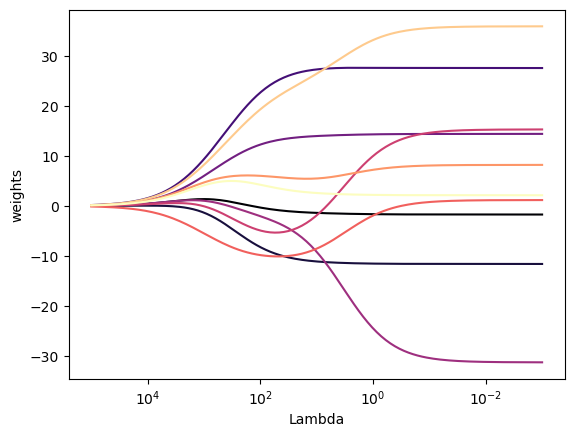

In [73]:
#| label: fig-ridge-path
#| fig-cap: Ridge coefficients as a function of the regularization
import matplotlib.pyplot as plt
from sklearn import linear_model

# Alpha Grid
n_alphas = 200
alphas = np.logspace(-3, 5, n_alphas)

# Run Path
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Transpose the coefs array
coefs = np.array(coefs).T

# Color Palette
custom_palette = plt.cm.magma(np.linspace(0, 1, len(coefs)))

# Plot Path Results with custom color palette
ax = plt.gca()
for coef, color in zip(coefs, custom_palette):
    ax.plot(alphas, coef, color=color)          #If you dont want custom colors, just ignore loop and: ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Lambda")
plt.ylabel("weights")
plt.axis("tight")
plt.show()

As we can see from @fig-ridge-path, when alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. 

In practice it is necessary to tune `alpha` in such a way that a balance is maintained between both. We can do this using the cross-validated ridge regression function, `RidgeCV()`. By default, the function performs **generalized cross-validation** (an efficient form of **LOOCV**). The object works in a similar way as `GridSearchCV` (see later):

In [192]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

# Alphas
alphas = np.logspace(-6, 6, num=200)

# RidgeCV with LOOCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True) # MSE by default if scoring=None

# Fit the model
ridge_cv.fit(X_train, y_train)

# Get the MSE for each alpha value
mse_values = ridge_cv.cv_values_
mean_mse_values = mse_values.mean(axis=0)

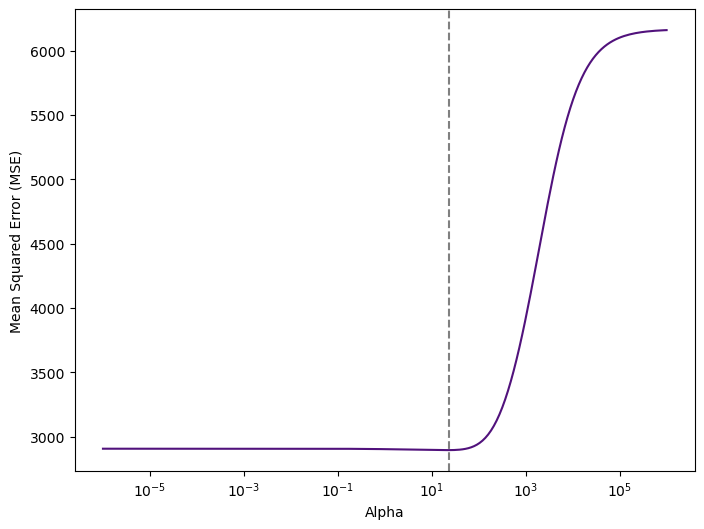

Optimal Alpha: 22.74


In [188]:
#| label: fig-ridge-mse
#| fig-cap: MSE vs. Alpha for Ridge Regression
#| code-fold: true
# Plot MSE against alpha
custom_palette = plt.cm.magma(0.25)  # Choose a color from the magma palette

# Setup 
plt.figure(figsize=(8, 6))

# Figure
plt.plot(alphas, mean_mse_values, color=custom_palette)
plt.axvline(x=ridge_cv.alpha_, color='grey', linestyle='--')

# Labels
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')

# Show
plt.show()

print("Optimal Alpha:", ridge_cv.alpha_.round(2))

Therefore, we see that the value of alpha that results in the smallest cross-validation error is 22.74. What is the test MSE associated with this value of alpha? Let's train our model now:

### Model Training & Evaluation

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Instantiate Class into Object. Set Parameters
ridge = Ridge(alpha=ridge_cv.alpha_)

# Train Model
ridge.fit(X_train, y_train)

# Predict
y_test_pred = ridge.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score, mean_squared_error
print('R2 Train', ridge.score(X_train, y_train).round(2) ) 
print('R2 Test', ridge.score(X_test, y_test).round(2) ) 
print( 'Test MSE:', mean_squared_error(y_test, y_test_pred).round(2) )

R2 Train 0.55
R2 Test 0.34
Test MSE: 3405.69


## Lasso Regression

Unlike best subset methods, ridge regression will include all $p$ predictors in the final model. The penalty $\lVert \beta \rVert_2^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless $ λ = ∞$). This may not be a problem for prediction accuracy, but it can create a **challenge in model interpretation** in settings in which the number of variables $p$ is quite large.

> The **LASSO** is a relatively recent alternative to ridge regression that overcomes this disadvantage.

The Least-Absolute Shrinkage and Selection Operator (LASSO) is shrinkage method based on the $l_1$ norm $(q = 1)$. The LASSO coefficients, $\hat\beta_\lambda^{\text{L}}$ , minimize the quantity:

$$
\hat{\beta}^{\text{L}}=\argmin_{\beta}\left[\text{RSS}+\lambda\sum^{p}_{j=1}\pink{|\beta_j|} \right]
$$

$$
\lambda \lVert \beta \rVert_1=\lambda\sum^{p}_{j=1}|\pink{\beta_j|}
$$

In LASSO, the nature of the $ℓ_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $λ$ is sufficiently large.

1. When $\lambda=0$, the **penalty has no effect**, and we obtain *OLS Estimator*.
2. When $0<\lambda<1$, ***some*** LASSO coefficients are ***set to zero***.
3. When $\lambda = \infty$, the LASSO coefficients are ***all exactly zero***.

For $λ$ between $0$ and $1$, we are *balancing two ideas*: 

1. Fitting a linear model of $y$ on $X$
2. Shrinking the coefficients (some to exactly zero).

> **Sparse Models**: Hence, much like best subset selection, the LASSO performs **variable selection**. Models generated from LASSO are much easier to interpret.


### Choosing $\lambda$: k-Fold CV

Critically important for Lasso estimation is the penalty $λ$. In contrast to ridge regression that uses LOOCV, the selection method used in Lasso regression is minimization of **$k$-fold cross validation**:

1. We choose a grid of $λ$ values, and compute the **cross-validation error** for each value of $λ$. For _Lasso_, **$k$-fold CV** is used.
2. We then **select** the tuning parameter value $\lambda$ for which the ***cross validation error is smallest***. 
3. Finally, the model is **re-fit** using all of the available observations and the selected value of the tuning parameter.

Conventionally, the value of $λ$ selected by CV is the value ***which minimizes the CV criterion***. Another popular choice is called the **“1 se” rule**, which is the $λ$ which ***selects the most parsimonious model for $λ$ values, but within one standard error of the minimum***.

`scikit-learn` exposes objects that set the Lasso `alpha` parameter by cross-validation: `LassoCV` and `LassoLarsCV`.

For high-dimensional datasets with many collinear features, `LassoCV` is most often preferable. However, `LassoLarsCV` has the advantage of exploring more relevant values of alpha parameter, and if the number of samples is very small compared to the number of features, it is often faster than `LassoCV`. As illustration, let's first run the Lasso Path:

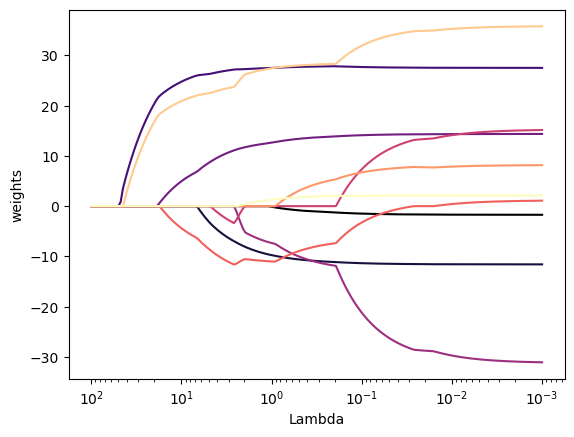

In [113]:
#| label: fig-lasso-path
#| fig-cap: Lasso coefficients as a function of the regularization

import matplotlib.pyplot as plt
from sklearn import linear_model

# Alpha Grid
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)

# Run Path
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Transpose the coefs array
coefs = np.array(coefs).T

# Color Palette
custom_palette = plt.cm.magma(np.linspace(0, 1, len(coefs)))

# Plot Path Results with custom color palette
ax = plt.gca()
for coef, color in zip(coefs, custom_palette):
    ax.plot(alphas, coef, color=color)          #If you dont want custom colors, just ignore loop and: ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Lambda")
plt.ylabel("weights")
plt.axis("tight")
plt.show()

As we can see from @fig-lasso-path, depending on the choice of the $\lambda$ tuning parameter, some of the coefficients are exactly equal to zero. 

We now perform **10-fold cross-validation** (the default is $k=5$) to choose the best `alpha`, refit the model, and compute the associated test error:

In [115]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

# Alphas
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)

# LassoCV with k-Fold
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000) #alphas are set automatically.

# Fit the model
lasso_cv.fit(X_train, y_train)

# Get the MSE for each alpha value
mse_values = np.mean(lasso_cv.mse_path_, axis=1)

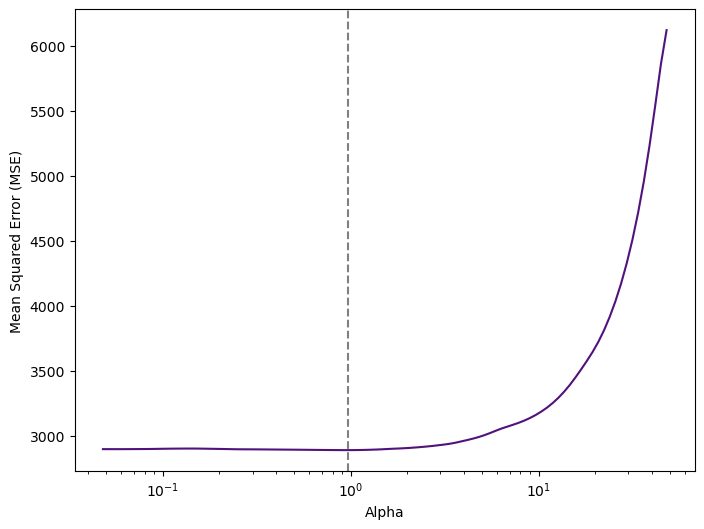

Optimal Alpha: 0.96


In [120]:
#| label: fig-lasso-mse
#| fig-cap: MSE vs. Alpha for Lasso Regression
#| code-fold: true
# Plot MSE against alpha
custom_palette = plt.cm.magma(0.25)  # Choose a color from the magma palette

# Setup 
plt.figure(figsize=(8, 6))

# Figure
plt.plot(lasso_cv.alphas_, mse_values, color=custom_palette)
plt.axvline(x=lasso_cv.alpha_, color='grey', linestyle='--')

# Labels
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')

# Show
plt.show()

print("Optimal Alpha:", lasso_cv.alpha_.round(2))

@fig-lasso-mse tell us that the value of alpha that results in the smallest cross-validation error is 0.96.

### Model Training & Evaluation

We can now train our model and evaluate:

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Instantiate Class into Object. Set Parameters
lasso = Lasso(alpha=lasso_cv.alpha_)

# Train Model
lasso.fit(X_train, y_train)

# Predict
y_test_pred = lasso.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, mean_squared_error
print('R2 Train', lasso.score(X_train, y_train).round(2) ) 
print('R2 Test', lasso.score(X_test, y_test).round(2) ) 
print( 'Test MSE:', mean_squared_error(y_test, y_test_pred).round(2) )

R2 Train 0.55
R2 Test 0.33
Test MSE: 3414.26


## Elastic Net Regression

The difference between **Lasso** and **ridge** regression is that the Lasso uses the *1-norm* penalty while ridge uses the *2-norm* penalty. It seems reasonable that further improvements may be obtained by a compromise. Taking a weighted average of the penalties we obtain the **Elastic Net** criterion:

$$
\text{SSE}(\beta,\lambda,\alpha)=(\textbf{Y}-\textbf{X}\beta)'(\textbf{Y}-\textbf{X}\beta) + \lambda \left( \alpha \pink{\lVert \beta\rVert_2^2}+(1-\alpha)\green{\lVert \beta\rVert_1} \right)
$$

- with weight $0 \leq \alpha \leq 1$. This includes Lasso $(\alpha=0)$ and ridge regression $(\alpha=1)$ as special cases.

$$
\alpha \pink{\lVert \beta\rVert_2^2}+(1-\alpha)\green{\lVert \beta\rVert_1} 
$$

### Choosing $\lambda$: k-Fold CV

Typically the parameters $(α,λ)$ are selected by joint minimization of the $k$-fold cross-validation criterion. 

In [158]:
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV

# RidgeCV with LOOCV
elastic_cv = ElasticNetCV(l1_ratio=0.5, cv = 10, max_iter = 100000) #alphas are set automatically.

# Fit the model
elastic_cv.fit(X_train, y_train)

# Get the MSE for each alpha value
mse_values = elastic_cv.mse_path_
mean_mse_values = mse_values.mean(axis=1)

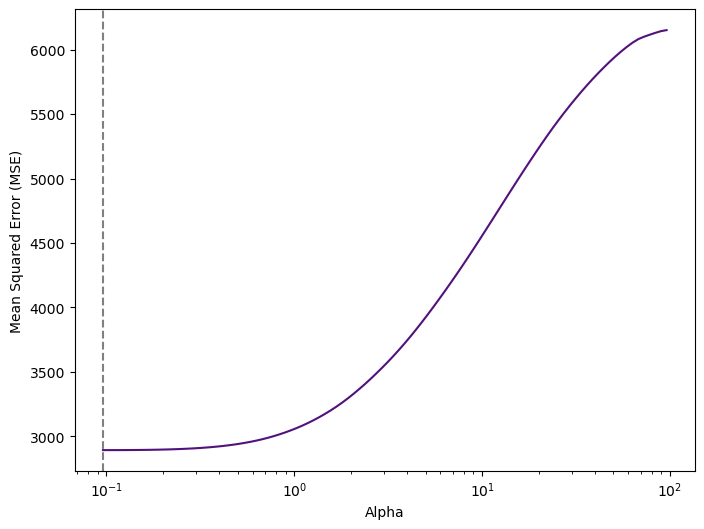

Optimal Alpha: 0.096


In [160]:
#| label: fig-elastic-mse
#| fig-cap: MSE vs. Alpha for Elastic Net
#| code-fold: true
# Plot MSE against alpha
custom_palette = plt.cm.magma(0.25)  # Choose a color from the magma palette

# Setup 
plt.figure(figsize=(8, 6))

# Figure
plt.plot(elastic_cv.alphas_, mean_mse_values, color=custom_palette)
plt.axvline(x=elastic_cv.alpha_, color='grey', linestyle='--')

# Labels
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')

# Show
plt.show()

print("Optimal Alpha:", elastic_cv.alpha_.round(3))

### Model Training & Evaluation

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# Instantiate Class into Object. Set Parameters
elastic = ElasticNet(alpha=elastic_cv.alpha_, l1_ratio=0.5)

# Train Model
elastic.fit(X_train, y_train)

# Predict
y_test_pred = elastic.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score, mean_squared_error
print('R2 Train', elastic.score(X_train, y_train).round(2) ) 
print('R2 Test', elastic.score(X_test, y_test).round(2) ) 
print( 'Test MSE:', mean_squared_error(y_test, y_test_pred).round(2) )

R2 Train 0.55
R2 Test 0.33
Test MSE: 3414.46
